# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [9]:
data = pd.read_csv('/content/x_superbowl.csv')

print(data.info())
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 9756 non-null   int64  
 1   _id                        9756 non-null   object 
 2   created_at                 9756 non-null   object 
 3   id                         9756 non-null   float64
 4   id_str                     9756 non-null   int64  
 5   text                       9756 non-null   object 
 6   display_text_range         3222 non-null   object 
 7   source                     9747 non-null   object 
 8   truncated                  9756 non-null   bool   
 9   in_reply_to_status_id      2863 non-null   float64
 10  in_reply_to_status_id_str  2863 non-null   float64
 11  in_reply_to_user_id        2985 non-null   float64
 12  in_reply_to_user_id_str    2985 non-null   float64
 13  in_reply_to_screen_name    2985 non-null   objec

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [11]:
# Dropping columns with a large number of missing values or that are not useful for our analysis
columns_to_drop = ['Unnamed: 0', 'geo', 'coordinates', 'place', 'contributors',
                   'in_reply_to_status_id', 'in_reply_to_status_id_str',
                   'in_reply_to_user_id', 'in_reply_to_user_id_str',
                   'in_reply_to_screen_name', 'possibly_sensitive', 'quoted_status_id',
                   'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'scopes']
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Detect and filter out outliers if necessary (Example based on 'retweet_count')
retweet_outliers_threshold = data_cleaned['retweet_count'].quantile(0.99)
data_filtered = data_cleaned[data_cleaned['retweet_count'] <= retweet_outliers_threshold]

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

<ipython-input-12-57e863ca3bde>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['source_device'] = data_filtered['source'].str.extract(r'>(.*?)<')
<ipython-input-12-57e863ca3bde>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=device_counts.index, x=device_counts.values, palette="viridis")


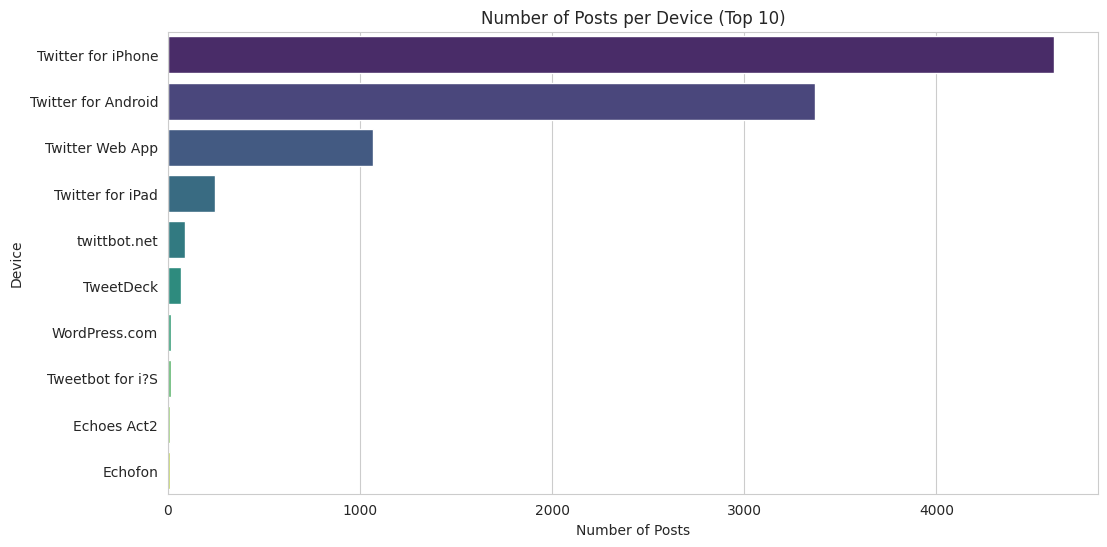

In [12]:
#chart 1
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

data_filtered['source_device'] = data_filtered['source'].str.extract(r'>(.*?)<')
device_counts = data_filtered['source_device'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=device_counts.index, x=device_counts.values, palette="viridis")
plt.title('Number of Posts per Device (Top 10)')
plt.xlabel('Number of Posts')
plt.ylabel('Device')
plt.show()

<ipython-input-14-cab7676cea16>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_engagement', y='text_shortened', data=top_engagement, palette="rocket")


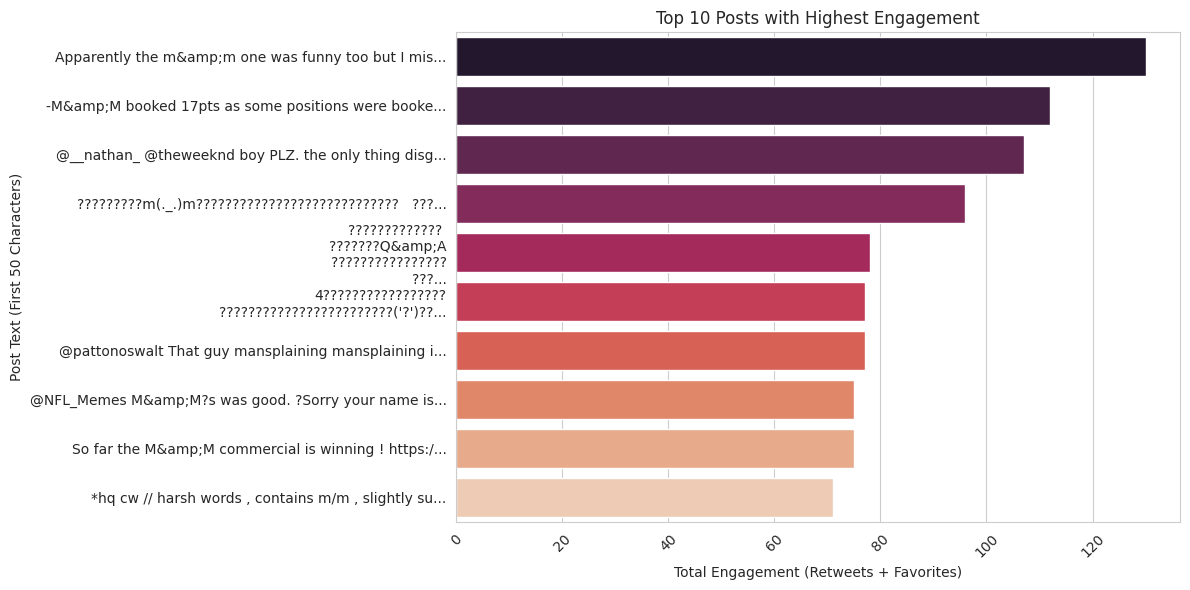

In [14]:
#chart 2

top_engagement['text_shortened'] = top_engagement['text'].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_engagement', y='text_shortened', data=top_engagement, palette="rocket")
plt.title('Top 10 Posts with Highest Engagement')
plt.xlabel('Total Engagement (Retweets + Favorites)')
plt.ylabel('Post Text (First 50 Characters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
